In [75]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

 



import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

 

nltk.download('punkt' )
nltk.download("wordnet")
nltk.download( 'averaged_perceptron_tagger')


 


 
 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [77]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


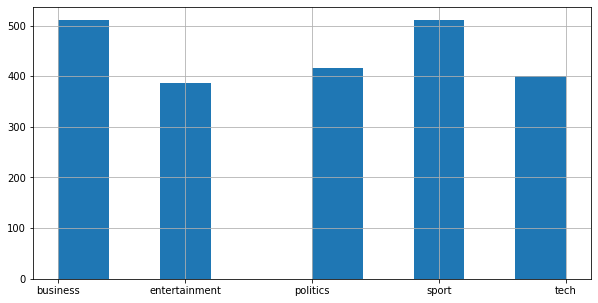

In [78]:

inputs = df['text']
labels = df['labels']

labels.hist(figsize=(10, 5));

In [79]:
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(
inputs, labels, random_state=123)


In [80]:
vectorizer = CountVectorizer()

Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

 

In [81]:
Xtrain
(Xtrain != 0).sum()

# what percentage of values are non-zero?
(Xtrain != 0).sum() / np.prod(Xtrain.shape)

model1 = MultinomialNB()
model1.fit(Xtrain, Ytrain)
print("train score:", model1.score(Xtrain, Ytrain) )
a=model1.score(Xtest, Ytest)
print("test score:", model1.score(Xtest, Ytest) )

train score: 0.9922062350119905
test score: 0.9712746858168761


In [82]:
 

# with stopwords

vectorizer = CountVectorizer(stop_words='english' )
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)

model2 = MultinomialNB( )

model2.fit(Xtrain, Ytrain)

print("train score:", model2.score(Xtrain, Ytrain) )
b=model2.score(Xtest, Ytest)
print("test score:", model2.score(Xtest, Ytest) )

 

train score: 0.9928057553956835
test score: 0.9766606822262118


In [83]:
def get_wordnet_pos(treebank_tag):

 if treebank_tag.startswith('J'):
  return wordnet.ADJ

 elif treebank_tag.startswith('V'):
  return wordnet.VERB
  
 elif treebank_tag.startswith('N'):
  return wordnet .NOUN

 elif treebank_tag.startswith('R'):
  return wordnet.ADV

 else:
  return wordnet.NOUN

 



In [84]:
class LemmaTokenizer:
 def __init__(self):
  self.wnl = WordNetLemmatizer()
 def __call__(self, doc):
  tokens = word_tokenize(doc)
  words_and_tags = nltk.pos_tag(tokens)
  return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
          for word, tag in words_and_tags]

 

In [85]:
 nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [86]:
# with lemmatization
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer() )
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model3 = MultinomialNB()
model3.fit(Xtrain, Ytrain)
print("train score:", model3.score(Xtrain, Ytrain) )
c=model3.score(Xtest, Ytest)
print("test score:", model3.score(Xtest, Ytest) )

train score: 0.9922062350119905
test score: 0.9676840215439856


In [87]:
class StemTokenizer:
 def __init__ (self):
  self.porter = PorterStemmer()
 def __call__ (self, doc):
  tokens = word_tokenize(doc)
  return [self.porter.stem(t) for t in tokens]

 

In [88]:
# with stemming

vectorizer = CountVectorizer(tokenizer=StemTokenizer() )
Xtrain = vectorizer.fit_transform(inputs_train)

Xtest = vectorizer.transform(inputs_test)

model4 = MultinomialNB()

model4.fit(Xtrain, Ytrain)

print("train score:", model4.score(Xtrain, Ytrain) )
d=model4.score(Xtest, Ytest)
print("test score:", model4.score(Xtest, Ytest) )

train score: 0.9892086330935251
test score: 0.9694793536804309


In [89]:
def simple_tokenizer(s):
 return s.split()

  

In [90]:
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model5 = MultinomialNB()
model5.fit(Xtrain, Ytrain)
print("train score:", model5.score(Xtrain, Ytrain) )
e=model5.score(Xtest, Ytest)
print("test score:", model5.score(Xtest, Ytest) )


train score: 0.9952038369304557
test score: 0.9712746858168761


In [17]:
import numpy as np

import pandas as pd

import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

 


In [18]:
df = pd.read_csv('bbc_text_cls.csv')

df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [19]:

df['labels'].astype( "category" ).cat.codes
df['targets'] = df['labels'].astype("category").cat.codes

df_train, df_test = train_test_split(df, test_size=0.3)
 

In [20]:

tfidf = TfidfVectorizer(stop_words='english' )
Xtrain = tfidf.fit_transform(df_train['text'])
Xtest = tfidf.transform(df_test[ 'text'])

 


In [21]:
Ytrain = df_train['targets']
Ytest = df_test['targets']

In [22]:
K= df['targets'].max() + 1
K


 


5

In [23]:
D= Xtrain.shape[1]




In [24]:

# build model

i = Input(shape=(D, ) )
x = Dense(300, activation='relu')(i)
x = Dense(K)(x) # softmax included in loss

model6 = Model(i, x)

 

In [26]:
model6.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25217)]           0         
                                                                 
 dense (Dense)               (None, 300)               7565400   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,566,905
Trainable params: 7,566,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model6.compile(
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 optimizer='adam',
 metrics=[ 'accuracy' ]
 )

 


In [28]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

 f=0.9850

In [29]:
r=model6.fit(
 Xtrain, Ytrain,
 validation_data=(Xtest, Ytest),
 epochs=10,
 batch_size=128,
)

Epoch 1/10
13/13 [==============================] - 3s 177ms/step - loss: 1.4636 - accuracy: 0.8439 - val_loss: 1.1805 - val_accuracy: 0.9611
Epoch 2/10
13/13 [==============================] - 2s 141ms/step - loss: 0.9177 - accuracy: 0.9917 - val_loss: 0.7136 - val_accuracy: 0.9701
Epoch 3/10
13/13 [==============================] - 2s 141ms/step - loss: 0.4582 - accuracy: 0.9968 - val_loss: 0.4008 - val_accuracy: 0.9775
Epoch 4/10
13/13 [==============================] - 3s 200ms/step - loss: 0.2056 - accuracy: 0.9974 - val_loss: 0.2473 - val_accuracy: 0.9820
Epoch 5/10
13/13 [==============================] - 2s 177ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 0.1794 - val_accuracy: 0.9835
Epoch 6/10
13/13 [==============================] - 2s 138ms/step - loss: 0.0570 - accuracy: 1.0000 - val_loss: 0.1457 - val_accuracy: 0.9835
Epoch 7/10
13/13 [==============================] - 2s 140ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.1268 - val_accuracy: 0.9850
Epoch 

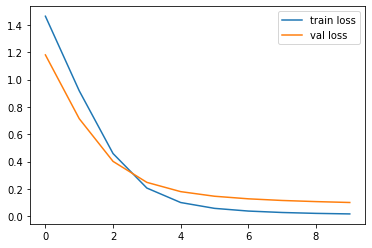

In [30]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

 

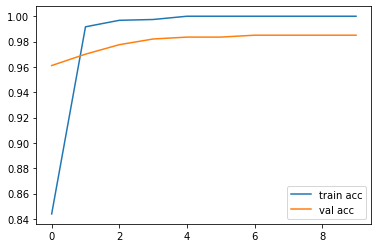

In [31]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();
 

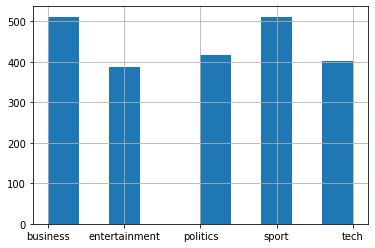

In [32]:

df['labels'].hist();

In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

 

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

from tensorflow.keras.losses import SparseCategoricalCrossentropy
 

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [34]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()
 


,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [35]:
df['targets'] = df['labels'].astype("category").cat.codes

# number of classes
K = df['targets'].max() + 1
K

df_train, df_test = train_test_split(df, test_size=0.3)

 

In [36]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train[ 'text'])
sequences_train = tokenizer.texts_to_sequences(df_train[ 'text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

 

In [37]:
# get word -> integer mapping
word2idx = tokenizer.word_index

V = len(word2idx)

print('Found %s unique tokens.' % V)

Found 27945 unique tokens.


In [38]:

# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (1557, 2837)


In [39]:
# get sequence length
T = data_train.shape[1]
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)


Shape of data test tensor: (668, 2837)


In [40]:
#Note: we actually want to the size of the embedding to(V +  1) x D,
#because the first index starts from 1 and not 0.
#Thus, if the final index of the embedding matrix is V,
#then it actually must have size V + l.
D=50
i= Input (shape=(T, ) )
x=Embedding(V + 1, D)(i)
x=Conv1D(32, 3, activation='relu' ) (x)
x= MaxPooling1D(3) (x)
x=Conv1D(64, 3, activation='relu' ) (x)
x=MaxPooling1D(3) (x)
x=Conv1D(128, 3, activation='relu' ) (x)
x=GlobalMaxPooling1D() (x)
x=Dense(K) (x)
model7=Model(i,x)

 f=0.9850
 g=0.9416

In [97]:
model7.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2837)]            0         
                                                                 
 embedding (Embedding)       (None, 2837, 50)          1397300   
                                                                 
 conv1d (Conv1D)             (None, 2835, 32)          4832      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 945, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 943, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 314, 64)          0         
 1D)                                                       

In [42]:
model7 .compile(
 loss=SparseCategoricalCrossentropy(from_logits=True),
 optimizer='adam',
 metrics=['accuracy' ]
)
print('Training model...')
r = model7. fit(
 data_train,
 df_train['targets'],
 epochs=10,
 validation_data=(data_test, df_test['targets'])
 )



Training model...
Epoch 1/10
49/49 [==============================] - 17s 333ms/step - loss: 1.6026 - accuracy: 0.2274 - val_loss: 1.5957 - val_accuracy: 0.2111
Epoch 2/10
49/49 [==============================] - 16s 331ms/step - loss: 1.5072 - accuracy: 0.3404 - val_loss: 1.2292 - val_accuracy: 0.4596
Epoch 3/10
49/49 [==============================] - 17s 354ms/step - loss: 0.7287 - accuracy: 0.7187 - val_loss: 0.3921 - val_accuracy: 0.8787
Epoch 4/10
49/49 [==============================] - 18s 342ms/step - loss: 0.1642 - accuracy: 0.9583 - val_loss: 0.1956 - val_accuracy: 0.9356
Epoch 5/10
49/49 [==============================] - 16s 333ms/step - loss: 0.0383 - accuracy: 0.9936 - val_loss: 0.1912 - val_accuracy: 0.9371
Epoch 6/10
49/49 [==============================] - 17s 341ms/step - loss: 0.0149 - accuracy: 0.9987 - val_loss: 0.1719 - val_accuracy: 0.9431
Epoch 7/10
49/49 [==============================] - 16s 333ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1734 - va

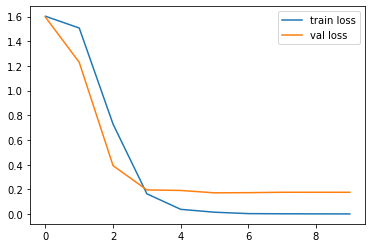

In [43]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')

plt.plot(r.history['val_loss'], label='val loss')
plt.legend();



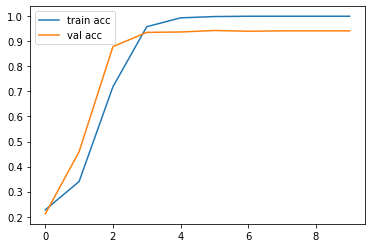

In [44]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [45]:
import numpy as np

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Embedding
from tensorflow.keras.models import Model

from tensorflow.keras.losses import SparseCategoricalCrossentropy


In [46]:
df = pd.read_csv('bbc_text_cls.csv')
df.head()
 

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [47]:
df['targets'] = df['labels'].astype("category").cat.codes

# number of classes
K = df['targets'].max() + 1
K

df_train, df_test = train_test_split(df, test_size=0.3)

In [48]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train[ 'text'])
sequences_train = tokenizer.texts_to_sequences(df_train[ 'text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

 

In [49]:
word2idx = tokenizer.word_index

V = len(word2idx)

print('Found %s unique tokens.' % V)

Found 27945 unique tokens.


In [50]:

# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (1557, 3474)


In [51]:
# get sequence length
T = data_train.shape[1]
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)



Shape of data test tensor: (668, 3474)


In [52]:
D=20
i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(32, return_sequences=True) (x)
x = GlobalMaxPooling1D() (x)
x = Dense (K) (x)
model8 = Model(i, x)

In [98]:
model8.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 3474)]            0         
                                                                 
 embedding_1 (Embedding)     (None, 3474, 20)          558920    
                                                                 
 lstm (LSTM)                 (None, 3474, 32)          6784      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 565,869
Trainable params: 565,869
Non-trainable params: 0
_____________________________________________________

In [54]:
model8 .compile(
 loss=SparseCategoricalCrossentropy(from_logits=True),
 optimizer='adam',
 metrics=['accuracy' ]
)
print('Training model...')
r = model8. fit(
 data_train,
 df_train['targets'],
 epochs=10,
 validation_data=(data_test, df_test['targets'])
 )
 f=0.9850
 g=0.9416
 h=0.9476


Training model...
Epoch 1/10
49/49 [==============================] - 174s 4s/step - loss: 1.6016 - accuracy: 0.2254 - val_loss: 1.5855 - val_accuracy: 0.2725
Epoch 2/10
49/49 [==============================] - 169s 3s/step - loss: 1.5832 - accuracy: 0.3051 - val_loss: 1.5357 - val_accuracy: 0.3952
Epoch 3/10
49/49 [==============================] - 175s 4s/step - loss: 1.4707 - accuracy: 0.5003 - val_loss: 1.3120 - val_accuracy: 0.6003
Epoch 4/10
49/49 [==============================] - 172s 4s/step - loss: 1.1565 - accuracy: 0.6513 - val_loss: 0.8945 - val_accuracy: 0.7665
Epoch 5/10
49/49 [==============================] - 170s 3s/step - loss: 0.9353 - accuracy: 0.8125 - val_loss: 0.8697 - val_accuracy: 0.9162
Epoch 6/10
49/49 [==============================] - 173s 4s/step - loss: 0.7031 - accuracy: 0.9332 - val_loss: 0.5807 - val_accuracy: 0.8937
Epoch 7/10
49/49 [==============================] - 173s 4s/step - loss: 0.4736 - accuracy: 0.9171 - val_loss: 0.4959 - val_accuracy: 0.

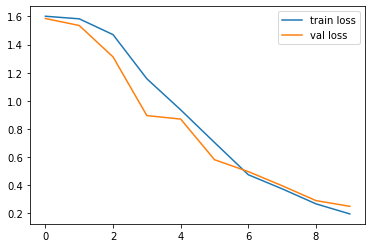

In [55]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

 

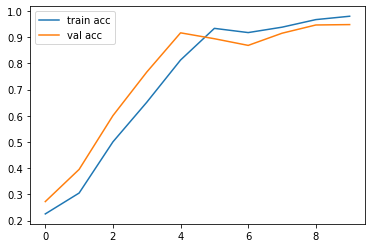

In [56]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();
 

In [91]:
 f=0.9850
 g=0.9416
 h=0.9476

In [92]:
model_results = pd.DataFrame({"count vectorizer":[a] ,
                              "count vectorizer with stopwords": [b],
                              "count vectorizer with lemmatization": [c],
                              "count vectorizer with stemming": [d],
                              "count vectorizer with simple split": [e],
                              "ann with td-idf vectorizer" :[f],
                              "cnn with embedding": [g],
                              "Lstm with embedding": [h],
                              
                               }).T
model_results.head(10)

,0
count vectorizer,0.971275
count vectorizer with stopwords,0.976661
count vectorizer with lemmatization,0.967684
count vectorizer with stemming,0.969479
count vectorizer with simple split,0.971275
ann with td-idf vectorizer,0.985000
cnn with embedding,0.941600
Lstm with embedding,0.947600


Text(0.5, 1.0, 'model ranking')

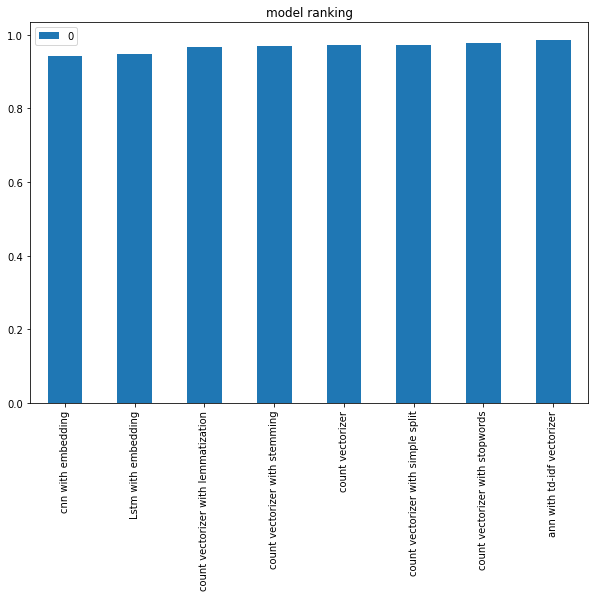

In [99]:
model_results[[0]].sort_values(0).plot(figsize=(10, 7), kind="bar");
plt.title('model ranking')